# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Rizki Surya Nugroho
- **Email:** nugrohorizki20@gmail.com
- **ID Dicoding:** surya2003

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara (PM2.5 dan PM10) di stasiun Tiantan dan Shunyi dari 2013-2017?
- Faktor cuaca apa yang memiliki korelasi paling kuat dengan tingkat polusi udara (PM2.5)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Membaca Data Air Quality di Station Tiantan

In [2]:
tiantan_air = pd.read_csv("data/data_1.csv")
tiantan_air.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


#### Membaca Data Air Quality di Station Shunyi

In [3]:
shunyi_air = pd.read_csv("data/data_2.csv")
shunyi_air.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


**Insight:**
- Kedua data memiliki struktur data (kolom data) yang sama
- Terdapat missing value 

### Assessing Data

#### Menilai Data tiantan_air

In [4]:
tiantan_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Menampilkan Data Missing Value pada tiantan_air

In [5]:
tiantan_air.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

#### Menampilkan Data yang Duplicate pada tiantan_air

In [6]:
dupe_tiantan = tiantan_air.duplicated().sum()
print(f"Jumlah data duplikasi pada tiantan_air: {dupe_tiantan}")

Jumlah data duplikasi pada tiantan_air: 0


#### Memeriksa Parameter Statisik pada tiantan_air

In [7]:
tiantan_air.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Menilai Data shunyi_air

In [8]:
shunyi_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Menampilkan Data Missing Value pada shunyi_air

In [9]:
shunyi_air.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

#### Menampilkan Data yang Duplicate pada shunyi_air

In [10]:
dupe_shunyi = shunyi_air.duplicated().sum()
print(f"Jumlah data duplikasi pada shunyi_air:", dupe_shunyi)

Jumlah data duplikasi pada shunyi_air: 0


#### Memeriksa Parameter Statistik pada shunyi_air

In [11]:
shunyi_air.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


**Insight:**
- Kedua data tidak memiliki duplikasi data
- Kedua data memiliki permasalahan yang sama yaitu missing values

### Cleaning Data

#### Menangani Missing Value pada tiantan_air

##### Menampilkan data yang mengandung Missing Value pada kolom PM2.5

In [12]:
tiantan_air[tiantan_air['PM2.5'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
174,175,2013,3,8,6,NaN,NaN,NaN,NaN,NaN,107.0,3.5,1001.6,-2.5,0.0,E,0.7,Tiantan
175,176,2013,3,8,7,NaN,NaN,NaN,NaN,NaN,107.0,6.6,1002.2,-0.9,0.0,S,0.1,Tiantan
178,179,2013,3,8,10,NaN,373.0,116.2392,211.6643,NaN,107.0,19.9,1002.4,-5.2,0.0,E,0.9,Tiantan
1282,1283,2013,4,23,10,NaN,NaN,NaN,NaN,NaN,NaN,12.6,1007.1,8.3,0.0,SSE,1.1,Tiantan
1283,1284,2013,4,23,11,NaN,NaN,NaN,NaN,NaN,NaN,13.8,1006.6,8.2,0.0,SE,1.5,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Tiantan
35017,35018,2017,2,27,1,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1019.8,-6.9,0.0,NE,1.3,Tiantan
35030,35031,2017,2,27,14,NaN,NaN,NaN,NaN,NaN,NaN,14.2,1014.7,-6.7,0.0,SW,2.1,Tiantan
35031,35032,2017,2,27,15,NaN,NaN,NaN,NaN,NaN,NaN,15.7,1014.1,-7.2,0.0,SW,2.7,Tiantan


##### Menangani missing value pada kolom PM2.5 menggunakan metode Interpolation karena data ini adalah data time series

In [13]:
tiantan_air['PM2.5'].interpolate(method='linear', inplace=True)

##### Mengecek kembali apakah masih ada Missing Value pada kolom PM2.5

In [14]:
tiantan_air[tiantan_air['PM2.5'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


##### Menampilkan data yang mengandung Missing Value pada kolom PM10

In [15]:
tiantan_air[tiantan_air['PM10'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
174,175,2013,3,8,6,224.333333,NaN,NaN,NaN,NaN,107.0,3.5,1001.6,-2.5,0.0,E,0.7,Tiantan
175,176,2013,3,8,7,113.666667,NaN,NaN,NaN,NaN,107.0,6.6,1002.2,-0.9,0.0,S,0.1,Tiantan
204,205,2013,3,9,12,87.000000,NaN,6.0,20.0,500.0,92.0,11.7,1005.8,-16.8,0.0,N,9.2,Tiantan
1282,1283,2013,4,23,10,161.500000,NaN,NaN,NaN,NaN,NaN,12.6,1007.1,8.3,0.0,SSE,1.1,Tiantan
1283,1284,2013,4,23,11,165.000000,NaN,NaN,NaN,NaN,NaN,13.8,1006.6,8.2,0.0,SE,1.5,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34885,34886,2017,2,21,13,44.000000,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Tiantan
35017,35018,2017,2,27,1,53.500000,NaN,NaN,NaN,NaN,NaN,5.0,1019.8,-6.9,0.0,NE,1.3,Tiantan
35030,35031,2017,2,27,14,101.500000,NaN,NaN,NaN,NaN,NaN,14.2,1014.7,-6.7,0.0,SW,2.1,Tiantan
35031,35032,2017,2,27,15,85.000000,NaN,NaN,NaN,NaN,NaN,15.7,1014.1,-7.2,0.0,SW,2.7,Tiantan


##### Menangani missing value pada kolom PM10 menggunakan metode Interpolation karena data ini adalah data time series

In [16]:
tiantan_air['PM10'].interpolate(method='linear', inplace=True)

##### Mengecek kembali apakah masih ada Missing Value pada kolom PM10

In [17]:
tiantan_air[tiantan_air['PM10'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


##### Menampilkan data yang mengandung Missing Value pada kolom SO2

In [18]:
tiantan_air[tiantan_air['SO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
26,27,2013,3,2,2,4.000000,8.000000,NaN,25.0,400.0,57.0,-2.2,1032.9,-16.7,0.0,N,0.0,Tiantan
122,123,2013,3,6,2,199.000000,226.000000,NaN,124.0,2799.0,94.0,6.3,1009.9,-7.0,0.0,NE,1.0,Tiantan
174,175,2013,3,8,6,224.333333,179.666667,NaN,NaN,NaN,107.0,3.5,1001.6,-2.5,0.0,E,0.7,Tiantan
175,176,2013,3,8,7,113.666667,91.333333,NaN,NaN,NaN,107.0,6.6,1002.2,-0.9,0.0,S,0.1,Tiantan
314,315,2013,3,14,2,57.000000,65.000000,NaN,48.0,1399.0,83.0,0.2,1026.5,-6.0,0.0,SE,2.0,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35030,35031,2017,2,27,14,101.500000,136.000000,NaN,NaN,NaN,NaN,14.2,1014.7,-6.7,0.0,SW,2.1,Tiantan
35031,35032,2017,2,27,15,85.000000,108.000000,NaN,NaN,NaN,NaN,15.7,1014.1,-7.2,0.0,SW,2.7,Tiantan
35032,35033,2017,2,27,16,68.500000,80.000000,NaN,NaN,NaN,NaN,15.9,1014.0,-9.9,0.0,SW,2.9,Tiantan
35057,35058,2017,2,28,17,9.000000,37.000000,NaN,NaN,NaN,NaN,14.2,1012.5,-14.9,0.0,NW,3.1,Tiantan


##### Menangani missing value pada kolom SO2 menggunakan metode Interpolation karena data ini adalah data time series

In [19]:
tiantan_air['SO2'].interpolate(method='linear', inplace=True)

##### Mengecek kembali apakah masih ada Missing Value pada kolom SO2

In [20]:
tiantan_air[tiantan_air['SO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


##### Menampilkan data yang mengandung Missing Value pada kolom NO2

In [21]:
tiantan_air[tiantan_air['NO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
28,29,2013,3,2,4,3.000000,8.000000,7.000000,NaN,500.0,54.0,-3.1,1032.7,-16.1,0.0,N,0.0,Tiantan
124,125,2013,3,6,4,157.000000,162.000000,68.000000,NaN,2500.0,94.0,5.1,1009.5,-6.5,0.0,NE,1.0,Tiantan
174,175,2013,3,8,6,224.333333,179.666667,25.000000,NaN,NaN,107.0,3.5,1001.6,-2.5,0.0,E,0.7,Tiantan
175,176,2013,3,8,7,113.666667,91.333333,28.000000,NaN,NaN,107.0,6.6,1002.2,-0.9,0.0,S,0.1,Tiantan
1180,1181,2013,4,19,4,70.000000,94.000000,41.000000,NaN,1399.0,19.0,7.1,1021.0,-4.7,0.0,SE,1.8,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35031,35032,2017,2,27,15,85.000000,108.000000,27.500000,NaN,NaN,NaN,15.7,1014.1,-7.2,0.0,SW,2.7,Tiantan
35032,35033,2017,2,27,16,68.500000,80.000000,19.250000,NaN,NaN,NaN,15.9,1014.0,-9.9,0.0,SW,2.9,Tiantan
35057,35058,2017,2,28,17,9.000000,37.000000,2.666667,NaN,NaN,NaN,14.2,1012.5,-14.9,0.0,NW,3.1,Tiantan
35058,35059,2017,2,28,18,15.000000,43.000000,2.333333,NaN,NaN,NaN,13.4,1013.0,-15.5,0.0,WNW,1.4,Tiantan


##### Menangani missing value pada kolom NO2 menggunakan metode Interpolation karena data ini adalah data time series

In [22]:
tiantan_air['NO2'].interpolate(method='linear', inplace=True)

##### Mengecek kembali apakah masih ada Missing Value pada kolom NO2

In [23]:
tiantan_air[tiantan_air['NO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


##### Menampilkan data yang mengandung Missing Value pada kolom CO

In [24]:
tiantan_air[tiantan_air['CO'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
27,28,2013,3,2,3,9.000000,10.000000,8.000000,26.000000,NaN,83.0,-3.1,1032.6,-15.8,0.0,N,0.0,Tiantan
123,124,2013,3,6,3,173.000000,186.000000,87.000000,122.000000,NaN,94.0,6.3,1009.6,-7.0,0.0,NE,0.7,Tiantan
174,175,2013,3,8,6,224.333333,179.666667,25.000000,114.666667,NaN,107.0,3.5,1001.6,-2.5,0.0,E,0.7,Tiantan
175,176,2013,3,8,7,113.666667,91.333333,28.000000,101.333333,NaN,107.0,6.6,1002.2,-0.9,0.0,S,0.1,Tiantan
178,179,2013,3,8,10,134.500000,373.000000,116.239200,211.664300,NaN,107.0,19.9,1002.4,-5.2,0.0,E,0.9,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35030,35031,2017,2,27,14,101.500000,136.000000,35.750000,100.250000,NaN,NaN,14.2,1014.7,-6.7,0.0,SW,2.1,Tiantan
35031,35032,2017,2,27,15,85.000000,108.000000,27.500000,79.500000,NaN,NaN,15.7,1014.1,-7.2,0.0,SW,2.7,Tiantan
35032,35033,2017,2,27,16,68.500000,80.000000,19.250000,58.750000,NaN,NaN,15.9,1014.0,-9.9,0.0,SW,2.9,Tiantan
35057,35058,2017,2,28,17,9.000000,37.000000,2.666667,24.750000,NaN,NaN,14.2,1012.5,-14.9,0.0,NW,3.1,Tiantan


##### Menangani missing value pada kolom CO menggunakan metode Interpolation karena data ini adalah data time series

In [25]:
tiantan_air['CO'].interpolate(method='linear', inplace=True)

##### Mengecek kembali apakah masih ada Missing Value pada kolom CO

In [26]:
tiantan_air[tiantan_air['CO'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


##### Menampilkan data yang mengandung Missing Value pada kolom O3

In [27]:
tiantan_air[tiantan_air['O3'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
507,508,2013,3,22,3,71.0,136.0,27.000000,45.00,1100.000000,NaN,4.5,1011.8,-6.1,0.0,NNW,1.5,Tiantan
603,604,2013,3,26,3,123.0,145.0,48.000000,81.00,1200.000000,NaN,3.5,1012.6,-5.2,0.0,SSW,0.0,Tiantan
659,660,2013,3,28,11,5.0,36.0,5.000000,46.00,500.000000,NaN,9.3,1018.6,-13.2,0.0,W,2.0,Tiantan
660,661,2013,3,28,12,20.0,54.0,5.000000,43.00,500.000000,NaN,10.7,1017.6,-10.8,0.0,NW,5.5,Tiantan
661,662,2013,3,28,13,17.0,58.0,8.000000,31.00,400.000000,NaN,11.8,1016.3,-11.1,0.0,WNW,3.7,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35032,35033,2017,2,27,16,68.5,80.0,19.250000,58.75,1050.000000,NaN,15.9,1014.0,-9.9,0.0,SW,2.9,Tiantan
35057,35058,2017,2,28,17,9.0,37.0,2.666667,24.75,366.666667,NaN,14.2,1012.5,-14.9,0.0,NW,3.1,Tiantan
35058,35059,2017,2,28,18,15.0,43.0,2.333333,28.50,433.333333,NaN,13.4,1013.0,-15.5,0.0,WNW,1.4,Tiantan
35059,35060,2017,2,28,19,20.0,48.0,2.000000,32.25,500.000000,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan


##### Menangani missing value pada kolom O3 menggunakan metode Interpolation karena data ini adalah data time series

In [28]:
tiantan_air['O3'].interpolate(method='linear', inplace=True)

##### Mengecek kembali apakah masih ada Missing Value pada kolom O3

In [29]:
tiantan_air[tiantan_air['O3'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


##### Untuk missing value pada kolom TEMP, PRES, DEWP, RAIN, wd, dan WSPM. Menggunakan Metode Dropping karena data yang hilang hanya sedikit

In [30]:
tiantan_air.dropna(axis=0, inplace=True)

##### Cek kembali missing value

In [31]:
tiantan_air.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [32]:
tiantan_air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34980 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       34980 non-null  int64  
 1   year     34980 non-null  int64  
 2   month    34980 non-null  int64  
 3   day      34980 non-null  int64  
 4   hour     34980 non-null  int64  
 5   PM2.5    34980 non-null  float64
 6   PM10     34980 non-null  float64
 7   SO2      34980 non-null  float64
 8   NO2      34980 non-null  float64
 9   CO       34980 non-null  float64
 10  O3       34980 non-null  float64
 11  TEMP     34980 non-null  float64
 12  PRES     34980 non-null  float64
 13  DEWP     34980 non-null  float64
 14  RAIN     34980 non-null  float64
 15  wd       34980 non-null  object 
 16  WSPM     34980 non-null  float64
 17  station  34980 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


#### Menangani Missing Value pada shunyi_air

##### Menampilkan data yang mengandung Missing Value pada kolom PM2.5

In [33]:
shunyi_air[shunyi_air['PM2.5'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
204,205,2013,3,9,12,NaN,NaN,NaN,NaN,NaN,90.0,12.7,1006.6,-15.1,0.0,NNW,9.9,Shunyi
205,206,2013,3,9,13,NaN,NaN,NaN,NaN,NaN,90.0,10.4,1009.0,-16.0,0.0,NW,7.6,Shunyi
206,207,2013,3,9,14,NaN,NaN,NaN,NaN,NaN,90.0,9.8,1010.4,-17.4,0.0,NW,6.2,Shunyi
207,208,2013,3,9,15,NaN,NaN,NaN,NaN,NaN,90.0,9.7,1011.7,-17.5,0.0,NNW,5.9,Shunyi
208,209,2013,3,9,16,NaN,NaN,NaN,NaN,NaN,90.0,10.3,1013.1,-17.9,0.0,NNW,6.2,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi
34936,34937,2017,2,23,16,NaN,NaN,2.0,14.0,300.0,84.0,8.1,1022.5,-15.5,0.0,WNW,3.9,Shunyi


##### Menangani missing value pada kolom PM2.5 menggunakan metode Interpolation karena data ini adalah data time series

In [34]:
shunyi_air['PM2.5'].interpolate(method='linear', inplace=True)

##### Mengecek kembali apakah masih ada Missing Value pada kolom PM2.5

In [35]:
shunyi_air[shunyi_air['PM2.5'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


##### Menampilkan data yang mengandung Missing Value pada kolom PM10

In [36]:
shunyi_air[shunyi_air['PM10'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
31,32,2013,3,2,7,13.000000,NaN,12.0,31.0,700.0,49.0,-2.7,1032.3,-16.4,0.0,N,1.3,Shunyi
88,89,2013,3,4,16,13.000000,NaN,8.0,21.0,500.0,84.0,14.9,1017.9,-13.3,0.0,SSW,3.0,Shunyi
204,205,2013,3,9,12,74.318182,NaN,NaN,NaN,NaN,90.0,12.7,1006.6,-15.1,0.0,NNW,9.9,Shunyi
205,206,2013,3,9,13,72.636364,NaN,NaN,NaN,NaN,90.0,10.4,1009.0,-16.0,0.0,NW,7.6,Shunyi
206,207,2013,3,9,14,70.954545,NaN,NaN,NaN,NaN,90.0,9.8,1010.4,-17.4,0.0,NW,6.2,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,105.000000,NaN,NaN,NaN,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,121.000000,NaN,NaN,NaN,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,93.000000,NaN,NaN,NaN,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi
34936,34937,2017,2,23,16,5.666667,NaN,2.0,14.0,300.0,84.0,8.1,1022.5,-15.5,0.0,WNW,3.9,Shunyi


##### Menangani missing value pada kolom PM10 menggunakan metode Interpolation karena data ini adalah data time series

In [37]:
shunyi_air['PM10'].interpolate(method='linear', inplace=True)

##### Mengecek kembali apakah masih ada Missing Value pada kolom PM10

In [38]:
shunyi_air[shunyi_air['PM10'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


##### Menampilkan data yang mengandung Missing Value pada kolom SO2

In [39]:
shunyi_air[shunyi_air['SO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2,3,2013,3,1,2,14.000000,14.000000,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
98,99,2013,3,5,2,93.000000,106.000000,NaN,5.0,200.0,84.0,2.2,1017.0,-10.7,0.0,NNE,1.7,Shunyi
194,195,2013,3,9,2,64.000000,93.000000,NaN,5.0,200.0,90.0,2.5,996.6,-3.8,0.0,WNW,1.7,Shunyi
204,205,2013,3,9,12,74.318182,731.045455,NaN,NaN,NaN,90.0,12.7,1006.6,-15.1,0.0,NNW,9.9,Shunyi
205,206,2013,3,9,13,72.636364,698.090909,NaN,NaN,NaN,90.0,10.4,1009.0,-16.0,0.0,NW,7.6,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34879,34880,2017,2,21,7,91.000000,108.000000,NaN,NaN,NaN,NaN,-2.5,1029.4,-14.9,0.0,NE,0.9,Shunyi
34880,34881,2017,2,21,8,105.000000,133.000000,NaN,NaN,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,121.000000,153.500000,NaN,NaN,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,93.000000,108.500000,NaN,NaN,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi


##### Menangani missing value pada kolom SO2 menggunakan metode Interpolation karena data ini adalah data time series

In [40]:
shunyi_air['SO2'].interpolate(method='linear', inplace=True)

##### Mengecek kembali apakah masih ada Missing Value pada kolom SO2

In [41]:
shunyi_air[shunyi_air['SO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


##### Menampilkan data yang mengandung Missing Value pada kolom NO2

In [42]:
shunyi_air[shunyi_air['NO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
4,5,2013,3,1,4,12.000000,12.000000,3.000000,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
100,101,2013,3,5,4,110.000000,133.000000,5.000000,NaN,200.0,84.0,0.2,1016.4,-9.0,0.0,NNE,1.7,Shunyi
196,197,2013,3,9,4,119.000000,131.000000,7.000000,NaN,100.0,90.0,1.4,994.3,-3.5,0.0,WSW,0.8,Shunyi
204,205,2013,3,9,12,74.318182,731.045455,58.086957,NaN,NaN,90.0,12.7,1006.6,-15.1,0.0,NNW,9.9,Shunyi
205,206,2013,3,9,13,72.636364,698.090909,57.173913,NaN,NaN,90.0,10.4,1009.0,-16.0,0.0,NW,7.6,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34879,34880,2017,2,21,7,91.000000,108.000000,28.666667,NaN,NaN,NaN,-2.5,1029.4,-14.9,0.0,NE,0.9,Shunyi
34880,34881,2017,2,21,8,105.000000,133.000000,35.333333,NaN,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,121.000000,153.500000,48.000000,NaN,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,93.000000,108.500000,29.000000,NaN,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi


##### Menangani missing value pada kolom NO2 menggunakan metode Interpolation karena data ini adalah data time series

In [43]:
shunyi_air['NO2'].interpolate(method='linear', inplace=True)

##### Mengecek kembali apakah masih ada Missing Value pada kolom NO2

In [44]:
shunyi_air[shunyi_air['NO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


##### Menampilkan data yang mengandung Missing Value pada kolom CO

In [45]:
shunyi_air[shunyi_air['CO'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3,4,2013,3,1,3,12.0,12.0,3.000000,5.000000,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
99,100,2013,3,5,3,98.0,116.0,5.000000,4.000000,NaN,84.0,0.5,1016.7,-8.2,0.0,NNE,0.2,Shunyi
120,121,2013,3,6,0,200.0,208.0,79.682400,97.722800,NaN,61.0,4.5,1011.1,-5.0,0.0,NNW,0.7,Shunyi
131,132,2013,3,6,11,164.0,174.0,87.108000,75.755700,NaN,61.0,9.1,1010.5,-5.6,0.0,N,2.1,Shunyi
178,179,2013,3,8,10,174.0,196.0,74.256000,62.616500,NaN,98.0,16.8,1003.4,-1.4,0.0,SE,2.1,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34879,34880,2017,2,21,7,91.0,108.0,28.666667,73.333333,NaN,NaN,-2.5,1029.4,-14.9,0.0,NE,0.9,Shunyi
34880,34881,2017,2,21,8,105.0,133.0,35.333333,77.666667,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,121.0,153.5,48.000000,88.000000,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,93.0,108.5,29.000000,80.000000,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi


##### Menangani missing value pada kolom CO menggunakan metode Interpolation karena data ini adalah data time series

In [46]:
shunyi_air['CO'].interpolate(method='linear', inplace=True)

##### Mengecek kembali apakah masih ada Missing Value pada kolom CO

In [47]:
shunyi_air[shunyi_air['CO'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


##### Menampilkan data yang mengandung Missing Value pada kolom O3

In [48]:
shunyi_air[shunyi_air['O3'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3,4,2013,3,1,3,12.000000,12.0,3.000000,5.000000,200.000000,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
483,484,2013,3,21,3,88.000000,76.0,3.000000,4.000000,400.000000,NaN,0.5,1011.7,-4.2,0.0,SE,1.4,Shunyi
484,485,2013,3,21,4,74.000000,92.0,3.000000,4.000000,100.000000,NaN,0.0,1011.1,-4.3,0.0,SE,1.0,Shunyi
578,579,2013,3,25,2,79.000000,142.0,10.000000,79.000000,1105.882353,NaN,0.4,1019.9,-5.6,0.0,SE,2.5,Shunyi
579,580,2013,3,25,3,67.000000,119.0,3.712800,9.000000,1141.176471,NaN,-0.2,1020.0,-5.8,0.0,SSE,2.1,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34879,34880,2017,2,21,7,91.000000,108.0,28.666667,73.333333,3066.666667,NaN,-2.5,1029.4,-14.9,0.0,NE,0.9,Shunyi
34880,34881,2017,2,21,8,105.000000,133.0,35.333333,77.666667,2933.333333,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,121.000000,153.5,48.000000,88.000000,2600.000000,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,93.000000,108.5,29.000000,80.000000,1900.000000,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi


##### Menangani missing value pada kolom O3 menggunakan metode Interpolation karena data ini adalah data time series

In [49]:
shunyi_air['O3'].interpolate(method='linear', inplace=True)

##### Mengecek kembali apakah masih ada Missing Value pada kolom O3

In [50]:
shunyi_air[shunyi_air['O3'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


##### Menampilkan data yang mengandung Missing Value pada kolom wd

In [51]:
shunyi_air[shunyi_air['wd'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
6764,6765,2013,12,7,20,380.000000,378.000000,44.000000,121.000000,8500.000000,4.000000,-0.1,1016.7,-2.2,0.0,NaN,0.1,Shunyi
16416,16417,2015,1,14,0,215.000000,215.000000,36.000000,86.000000,2800.000000,17.000000,-4.0,1027.9,-8.1,0.0,NaN,0.9,Shunyi
16760,16761,2015,1,28,8,7.000000,7.000000,2.000000,15.000000,300.000000,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,Shunyi
16790,16791,2015,1,29,14,32.000000,32.000000,4.000000,31.000000,600.000000,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,Shunyi
16812,16813,2015,1,30,12,15.000000,15.000000,2.000000,17.000000,500.000000,63.000000,NaN,NaN,NaN,NaN,NaN,NaN,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34872,34873,2017,2,21,0,104.333333,124.666667,33.333333,86.666667,2833.333333,3.666667,-3.2,1030.6,-13.2,0.0,NaN,0.2,Shunyi
34903,34904,2017,2,22,7,82.000000,82.000000,4.000000,56.000000,1600.000000,8.000000,-3.4,1018.3,-5.3,0.0,NaN,0.1,Shunyi
34944,34945,2017,2,24,0,74.000000,80.000000,30.000000,102.000000,2100.000000,2.000000,-1.1,1022.8,-9.2,0.0,NaN,0.2,Shunyi
34946,34947,2017,2,24,2,71.000000,86.000000,24.000000,99.000000,2200.000000,2.000000,-2.3,1023.0,-8.0,0.0,NaN,0.0,Shunyi


##### Menangani missing value pada kolom wd menggunakan metode Mode Imputation karena data ini adalah data kategorikal

In [52]:
shunyi_air['wd'].fillna(shunyi_air['wd'].mode()[0], inplace=True)

##### Mengecek kembali apakah masih ada Missing Value pada kolom wd

In [53]:
shunyi_air[shunyi_air['wd'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


##### Untuk missing value pada kolom TEMP, PRES, DEWP, RAIN, dan WSPM. Menggunakan Metode Dropping karena data yang hilang hanya sedikit

In [54]:
shunyi_air.dropna(axis=0, inplace=True)

##### Mengecek kembali apakah masih ada missing values

In [55]:
shunyi_air.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- Dengan menghapus atau mengisi missing value, kualitas data menjadi lebih baik
- Data yang bersih memungkinkan pengambilan keputusan yang lebih baik dan lebih tepat

## Exploratory Data Analysis (EDA)

### Explore Data tiantan_air

In [56]:
tiantan_air.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980,34980.000000,34980
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Tiantan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,34980
mean,17498.477015,2014.658519,6.525100,15.723613,11.501715,82.018568,106.538938,14.526451,53.247843,1304.691409,56.223276,13.687112,1012.537433,2.453548,0.064137,NaN,1.863310,NaN
std,10108.987731,1.175354,3.446217,8.801764,6.918894,80.926614,90.326237,20.294639,32.028926,1179.633158,59.484339,11.456090,10.266518,13.813296,0.786996,NaN,1.279225,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8745.750000,2014.000000,4.000000,8.000000,6.000000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17492.500000,2015.000000,7.000000,16.000000,12.000000,58.000000,85.000000,7.000000,47.000000,900.000000,40.491900,14.600000,1012.200000,3.100000,0.000000,NaN,1.500000,NaN
75%,26242.250000,2016.000000,10.000000,23.000000,17.000000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


#### Bagaimana rata-rata kondisi polusi udara tiap tahunnya di Stasiun Tiantan

In [57]:
tiantan_air.groupby(by='year').agg(
    {
        'PM2.5': 'mean', 
        'PM10': 'mean',
        'SO2': 'mean',
        'NO2': 'mean',
        'CO': 'mean',
        'O3': 'mean',
    }
)

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,83.210172,108.312704,18.202909,53.174606,1311.649714,55.159147
2014,86.689874,114.889526,19.771678,56.159241,1338.590183,56.664224
2015,82.061081,102.860498,11.809139,52.014256,1302.433173,60.385629
2016,73.783892,97.298192,8.976547,49.940739,1195.709873,55.712561
2017,97.902245,125.942795,14.056481,63.921434,1756.770456,35.933020


###### Dari eksplorasi ini didapatkan bahwa 2017 adalah tahun dengan tingkat polusi tertinggi

### Explore Data shunyi_air

In [58]:
shunyi_air.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010,35010.000000,35010
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNE,NaN,Shunyi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4978,NaN,35010
mean,17526.187861,2014.661411,6.528278,15.724907,11.500114,79.436752,99.270884,13.450344,44.101289,1198.031477,54.243545,13.387265,1013.062975,2.465036,0.061100,NaN,1.807644,NaN
std,10123.155987,1.177138,3.447051,8.799894,6.923325,81.516116,90.507510,19.470854,30.916540,1163.223755,54.619822,11.483828,10.177159,13.726622,0.761701,NaN,1.287808,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,NaN,0.000000,NaN
25%,8756.250000,2014.000000,4.000000,8.000000,5.250000,19.000000,31.000000,2.000000,20.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17540.500000,2015.000000,7.000000,16.000000,11.000000,55.000000,77.000000,5.000000,37.000000,900.000000,42.000000,14.400000,1012.700000,3.100000,0.000000,NaN,1.500000,NaN
75%,26293.750000,2016.000000,10.000000,23.000000,18.000000,111.000000,139.000000,16.000000,62.000000,1500.000000,76.000000,23.200000,1021.000000,15.100000,0.000000,NaN,2.300000,NaN


#### Bagaimana rata-rata kondisi polusi udara tiap tahunnya di Stasiun Shunyi

In [59]:
shunyi_air.groupby(by='year').agg(
    {
        'PM2.5': 'mean', 
        'PM10': 'mean',
        'SO2': 'mean',
        'NO2': 'mean',
        'CO': 'mean',
        'O3': 'mean',
    }
)

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,75.717341,95.133565,15.088282,41.658056,1241.313445,55.873092
2014,85.190993,111.620913,17.699406,46.826393,1173.173516,57.899463
2015,81.498980,100.413710,10.450516,43.132279,1189.354876,51.685768
2016,72.192912,88.030082,9.571844,42.543841,1099.971513,53.727510
2017,95.419630,106.996088,21.253556,55.615220,1792.852063,42.054410


###### Dari data ini juga didapatkan bahwa tahun 2017 memiliki polusi udara tertinggi pada stasiun Shunyi

**Insight:**
- Dari rata-rata data polusi udara tersebut, didapatkan bahwa tahun 2016 terjadi penurunan tingkat polusi yang mungkin karena adanya upaya pengendalian polusi.
- Tapi data polusi udara tersebut naik pesat di tahun 2017 yang mungkin banyak industri yang aktif di tahun tersebut

## Visualization & Explanatory Analysis

### Pertanyaan 1:

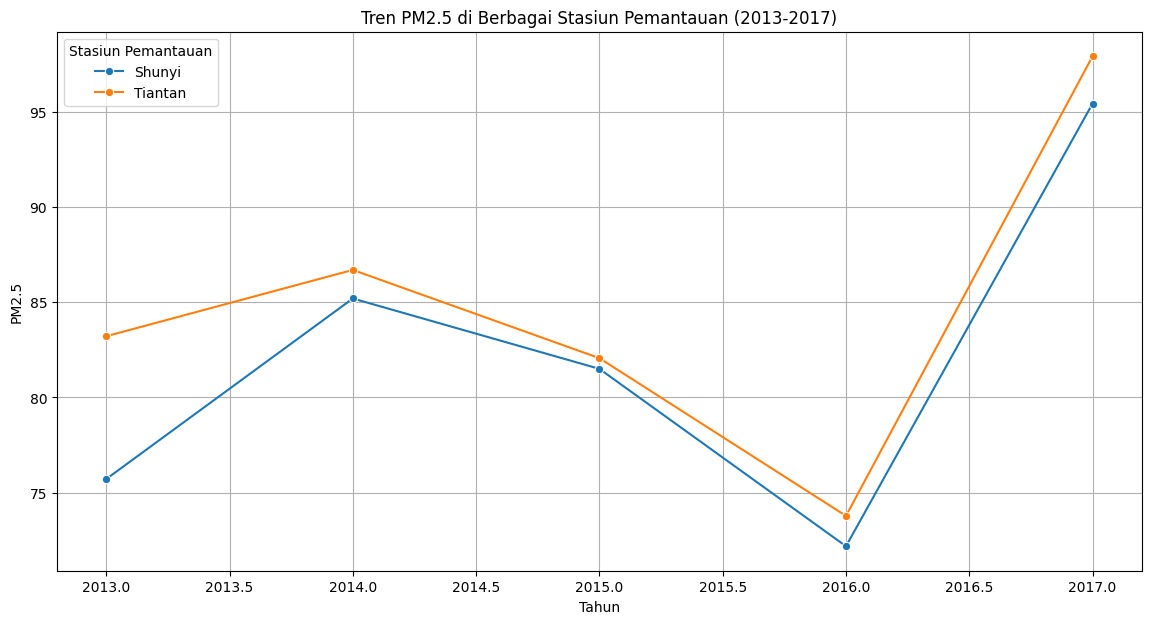

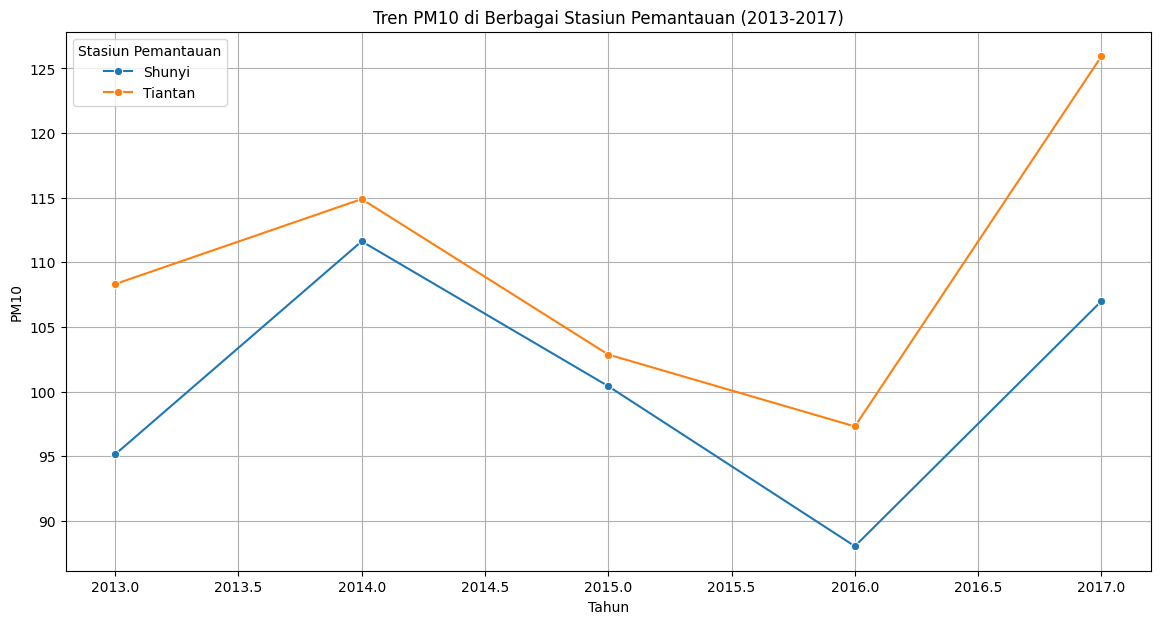

In [60]:
shunyi_setahun = shunyi_air.groupby(['year', 'station'])[['PM2.5', 'PM10']].mean().reset_index()

tiantan_setahun = tiantan_air.groupby(['year', 'station'])[['PM2.5', 'PM10']].mean().reset_index()

combined_data = pd.concat([shunyi_setahun, tiantan_setahun])

plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_data, x='year', y='PM2.5', hue='station', marker='o')
plt.title('Tren PM2.5 di Berbagai Stasiun Pemantauan (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('PM2.5')
plt.legend(title='Stasiun Pemantauan')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_data, x='year', y='PM10', hue='station', marker='o')
plt.title('Tren PM10 di Berbagai Stasiun Pemantauan (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('PM10')
plt.legend(title='Stasiun Pemantauan')
plt.grid(True)
plt.show()

### Pertanyaan 2:

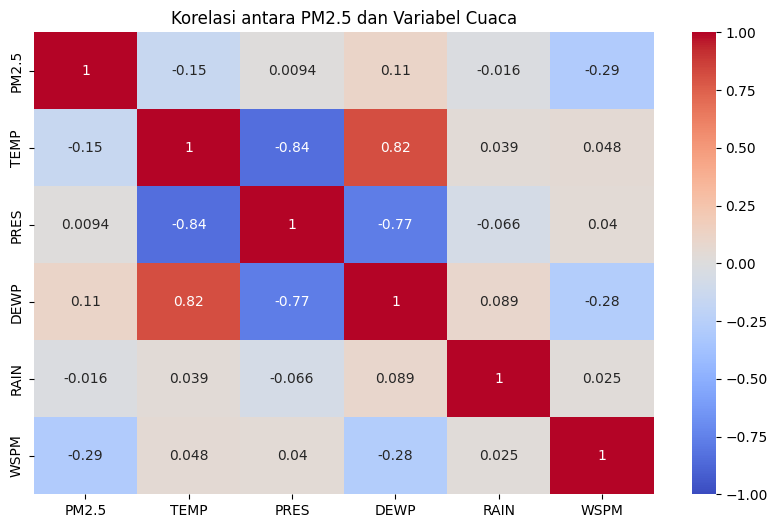

PM2.5    1.000000
DEWP     0.111560
PRES     0.009395
RAIN    -0.015966
TEMP    -0.152211
WSPM    -0.291981
Name: PM2.5, dtype: float64


In [61]:
tiantan_matrix = tiantan_air[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(tiantan_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi antara PM2.5 dan Variabel Cuaca')
plt.show()

print(tiantan_matrix['PM2.5'].sort_values(ascending=False))

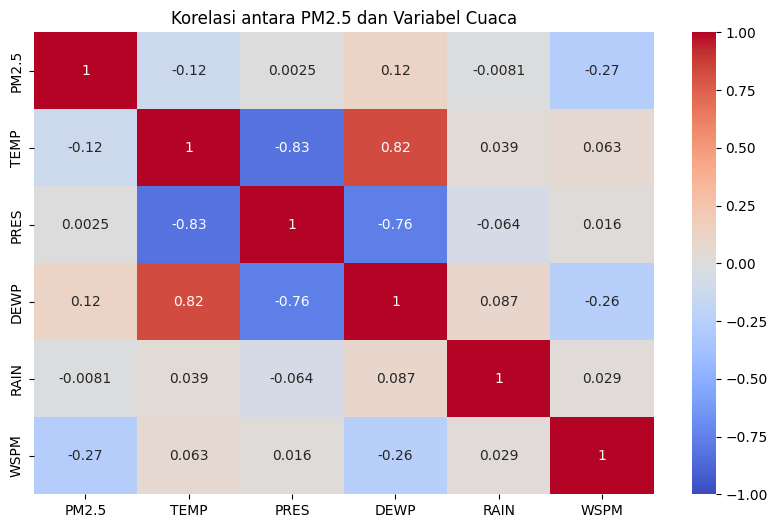

PM2.5    1.000000
DEWP     0.118340
PRES     0.002490
RAIN    -0.008096
TEMP    -0.120449
WSPM    -0.268023
Name: PM2.5, dtype: float64


In [62]:
shunyi_matrix = shunyi_air[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(shunyi_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi antara PM2.5 dan Variabel Cuaca')
plt.show()

print(shunyi_matrix['PM2.5'].sort_values(ascending=False))

**Insight:**
- Dengan memplot tren PM2.5 dan PM10 dari waktu ke waktu, kita dapat melihat apakah ada peningkatan atau penurunan dalam tingkat polusi udara. Ini bisa membantu dalam mengevaluasi efektivitas kebijakan pengendalian polusi udara.
- Dengan membandingkan tren PM2.5 dan PM10 di berbagai stasiun pemantauan, kita dapat mengidentifikasi area yang memiliki tingkat polusi udara yang lebih tinggi atau lebih rendah.
- Dengan menganalisis korelasi antara PM2.5 dan variabel cuaca seperti suhu (TEMP), tekanan udara (PRES), kelembaban (DEWP), curah hujan (RAIN), dan kecepatan angin (WSPM), kita dapat mengidentifikasi faktor cuaca yang paling mempengaruhi tingkat polusi udara.

## Analisis Lanjutan (Opsional)

#### Disini saya menggabungkan kedua data dan melakukan clustering dengan metode manual grouping dan membagi untuk PM2.5 menjadi 3 cluster yaitu Low (<50), Medium(50-100) dan High(>100). Lalu PM10 menjadi 4 cluster yaitu Low (<50), Medium(50-100), High(100-150) dan Very High(>150)

In [64]:
merged_df = pd.concat([tiantan_air, shunyi_air])

def manual_grouping_pm25(row):
    if row < 50:
        return 'Low'
    elif 50 <= row <= 100:
        return 'Medium'
    else:
        return 'High'

merged_df['PM2.5 Group'] = merged_df['PM2.5'].apply(manual_grouping_pm25)

def manual_grouping_pm10(row):
    if row < 50:
        return 'Low'
    elif 50 <= row <= 100:
        return 'Medium'
    elif 100 <= row <= 150:
        return 'High'
    else:
        return 'Very High'

merged_df['PM10 Group'] = merged_df['PM10'].apply(manual_grouping_pm10)

merged_df[['year', 'station', 'PM2.5', 'PM2.5 Group', 'PM10', 'PM10 Group']].head()

,year,station,PM2.5,PM2.5 Group,PM10,PM10 Group
0,2013,Tiantan,6.0,Low,6.0,Low
1,2013,Tiantan,6.0,Low,29.0,Low
2,2013,Tiantan,6.0,Low,6.0,Low
3,2013,Tiantan,6.0,Low,6.0,Low
4,2013,Tiantan,5.0,Low,5.0,Low


#### Visualisasi Hasil Clustering

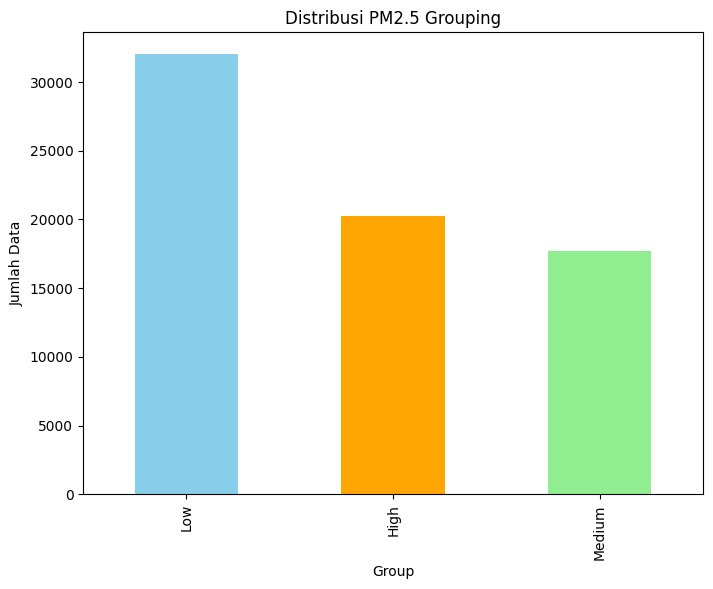

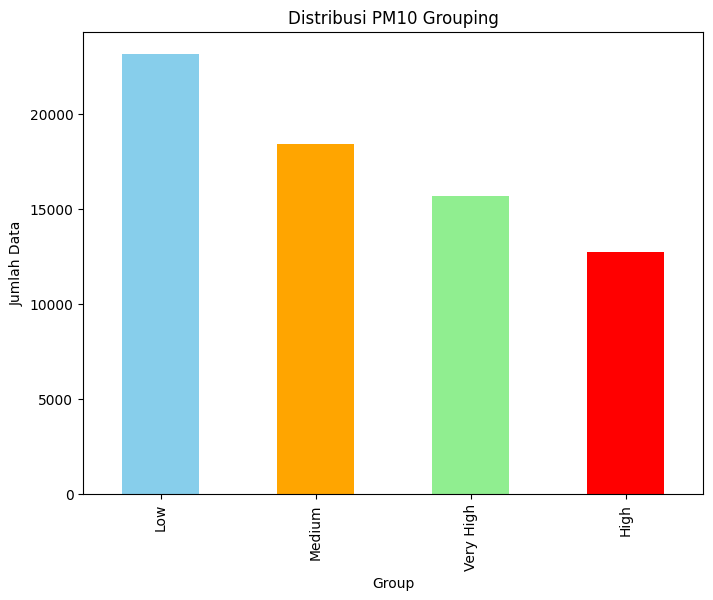

In [65]:
plt.figure(figsize=(8, 6))
merged_df['PM2.5 Group'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.title("Distribusi PM2.5 Grouping")
plt.xlabel("Group")
plt.ylabel("Jumlah Data")
plt.show()

plt.figure(figsize=(8, 6))
merged_df['PM10 Group'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'lightgreen', 'red'])
plt.title("Distribusi PM10 Grouping")
plt.xlabel("Group")
plt.ylabel("Jumlah Data")
plt.show()

##### Analisis Lanjutan ini dilakukan bertujuan untuk:
##### - Mempermudah pemahaman data, dengan menyederhanakan data yang kompleks ke dalam kategori yang jelas.
##### - Menentukan prioritas kebijakan dan strategi pengendalian polusi berdasarkan data yang dikelompokkan.

## Conclusion

- Berdasarkan visualisasi data dari pertanyaan 1, dapat disimpulkan bahwa rata-rata tingkat polusi pada kota Tiantan cenderung selalu lebih tinggi dari kota Shunyi setiap tahunnya dari 2013-2017.
- Berdasarkan visualisasi data dari pertanyaan 2, dapat disimpulkan bahwa Suhu (TEMP) memiliki korelasi negatif yang cukup kuat dengan PM2.5, yaitu -0.12. Ini menunjukkan bahwa semakin tinggi suhu, semakin rendah konsentrasi PM2.5, meskipun korelasinya tidak terlalu tinggi. Kelembaban (DEWP) memiliki korelasi positif yang cukup kuat dengan PM2.5, yaitu 0.12. Ini menunjukkan bahwa semakin tinggi kelembaban, semakin tinggi pula konsentrasi PM2.5. Tekanan udara (PRES) memiliki korelasi negatif dengan PM2.5, yaitu -0.83. Ini menunjukkan bahwa semakin tinggi tekanan udara, semakin rendah konsentrasi PM2.5.